In [1]:
import os, shutil

In [2]:
org1_ds_dir = '/Users/Ruturaj Nanoti/Downloads/face-mask-detector/dataset/with_mask'
org2_ds_dir = '/Users/Ruturaj Nanoti/Downloads/face-mask-detector/dataset/without_mask'

In [3]:
base_dir = '/Users/Ruturaj Nanoti/Downloads/face_maskd'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
v_dir = os.path.join(base_dir, 'valid')
os.mkdir(v_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_m_dir = os.path.join(train_dir, 'mask')
os.mkdir(train_m_dir)

train_wm_dir = os.path.join(train_dir, 'w-mask')
os.mkdir(train_wm_dir)

v_m_dir = os.path.join(v_dir, 'mask')
os.mkdir(v_m_dir)

v_wm_dir = os.path.join(v_dir, 'w-mask')
os.mkdir(v_wm_dir)

test_m_dir = os.path.join(test_dir, 'mask')
os.mkdir(test_m_dir)

test_wm_dir = os.path.join(test_dir, 'w-mask')
os.mkdir(test_wm_dir)

In [6]:
fnames = ['with-mask({}).jpg'.format(i) for i in range(1,414)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(train_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['with-mask({}).jpg'.format(i) for i in range(414, 552)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(v_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['with-mask({}).jpg'.format(i) for i in range(552, 690)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(test_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['w-m({}).jpg'.format(i) for i in range(410)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(train_wm_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['w-m({}).jpg'.format(i) for i in range(410, 548)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(v_wm_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['w-m({}).jpg'.format(i) for i in range(548, 686)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(test_wm_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
len(os.listdir(train_m_dir))

413

# Building the Covnet

In [8]:
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D(2, 2))
#model.add(layers.Conv2D(128, (3, 3)))
#model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=2,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                                    v_dir,
                                                    target_size=(150, 150),
                                                    batch_size=2,
                                                    class_mode='binary')

Found 823 images belonging to 2 classes.
Found 276 images belonging to 2 classes.


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_datagen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=8,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                                    v_dir,
                                                    target_size=(150, 150),
                                                    batch_size=8,
                                                    class_mode='binary')

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch=10,
                            epochs=10,
                            validation_data=validation_generator,
                            validation_steps=30)

Found 823 images belonging to 2 classes.
Found 276 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 72s 7s/step - loss: 0.8371 - acc: 0.5375 - val_loss: 0.7168 - val_acc: 0.4833
Epoch 2/10
10/10 [==============================] - 4s 366ms/step - loss: 0.6897 - acc: 0.5125 - val_loss: 0.5887 - val_acc: 0.7119
Epoch 3/10
10/10 [==============================] - 7s 719ms/step - loss: 0.6311 - acc: 0.6125 - val_loss: 0.5464 - val_acc: 0.7034
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.4777 - acc: 0.7250 - val_loss: 0.4123 - val_acc: 0.8263
Epoch 5/10
10/10 [==============================] - 8s 835ms/step - loss: 0.4445 - acc: 0.8000 - val_loss: 0.3631 - val_acc: 0.8729
Epoch 6/10
10/10 [==============================] - 6s 624ms/step - loss: 0.5627 - acc: 0.7000 - val_loss: 0.3135 - val_acc: 0.8983
Epoch 7/10
10/10 [==============================] - 8s 810ms/step - loss: 0.4067 -

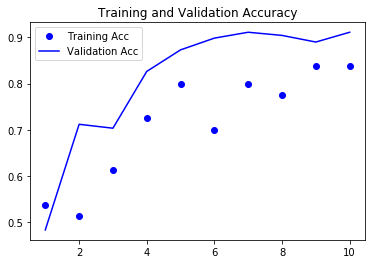

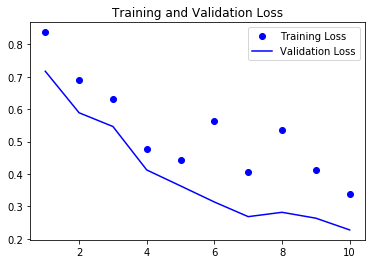

In [12]:
model.save('COVID_md.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
test_generator = train_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=2,
                                                    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test_acc:', test_acc)

Found 276 images belonging to 2 classes.
test_acc: 0.95
